# MULTICLASS CLASSIFICATION 



In [2]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (8000, 28, 28)
Y_train shape: (8000,)
X_test shape: (2000, 28, 28)
Y_test shape: (2000,)


In [6]:
#print the unique values in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


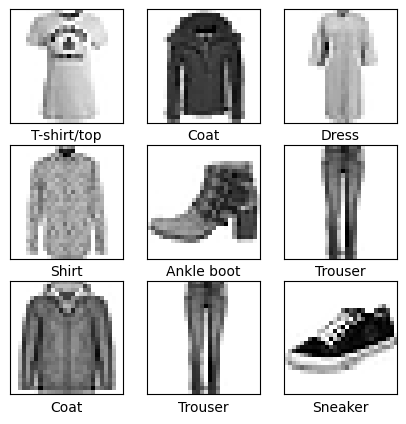

In [9]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import random
figure = plt.figure(figsize=(5,5))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[index], cmap=plt.cm.binary)
  #edit2__add_label_here_
  plt.xlabel(class_names[Y_train[index]])
plt.show()

###These number denotes the respective object
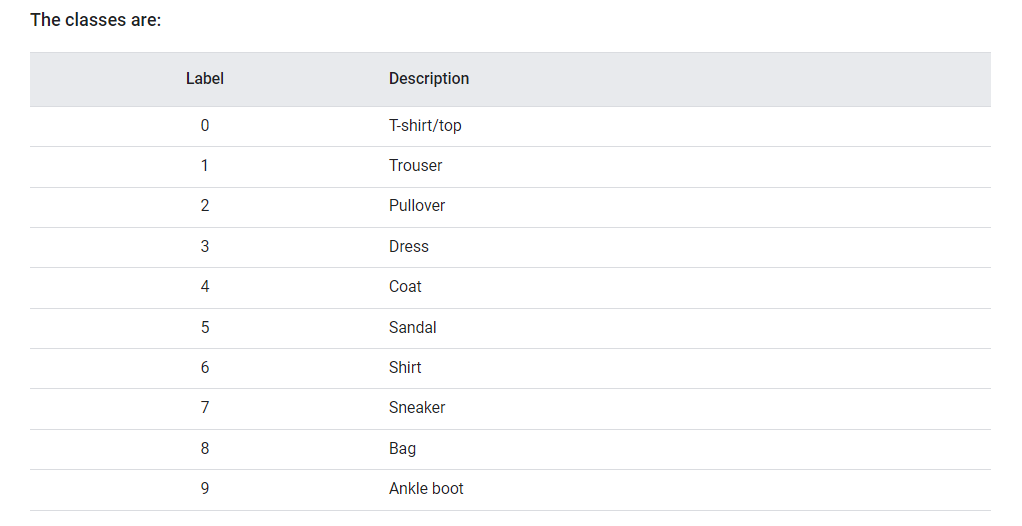

In [17]:
# Find the count of each type of class
unique_values, count = np.unique(Y_train, return_counts=True)
for i in range(len(unique_values)):
  print("Class:", unique_values[i], "Count:", count[i])

Class: 0 Count: 798
Class: 1 Count: 819
Class: 2 Count: 791
Class: 3 Count: 802
Class: 4 Count: 792
Class: 5 Count: 782
Class: 6 Count: 812
Class: 7 Count: 780
Class: 8 Count: 802
Class: 9 Count: 822


In [18]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))

#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [19]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
                  ,metrics=['accuracy'])

In [20]:
#Lets analyse the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [ ]:
""" 
[objective] Write the answer here: 
Trainable parameters in the model are 113,546
"""

In [24]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train,batch_size=64,epochs=50, validation_split=0.2)  #batch size=64 means that 64 samples of data will be processed together to make the process fast

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


100/100 [==============================] - 2s 7ms/step - loss: 10.9423 - accuracy: 0.4414 - val_loss: 5.7440 - val_accuracy: 0.5312
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 3.9682 - accuracy: 0.5908 - val_loss: 4.0997 - val_accuracy: 0.5844
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 3.0068 - accuracy: 0.6281 - val_loss: 3.3299 - val_accuracy: 0.6000
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 2.4573 - accuracy: 0.6509 - val_loss: 2.9629 - val_accuracy: 0.6175
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 2.1277 - accuracy: 0.6692 - val_loss: 2.7472 - val_accuracy: 0.6250
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 1.8781 - accuracy: 0.6803 - val_loss: 2.4542 - val_accuracy: 0.6431
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 1.6885 - accuracy: 0.6897 - val_loss: 2.2294 - val_accuracy: 0.6456
Epoch 8/50
100/1

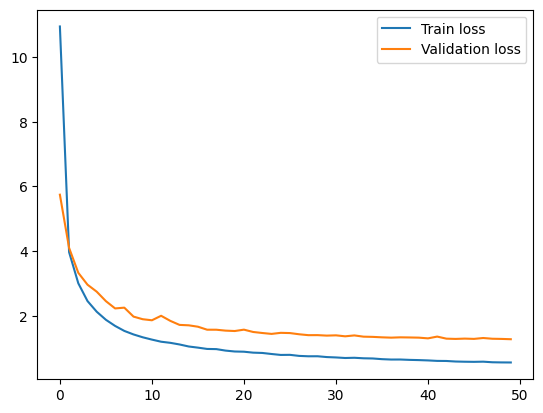

In [25]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [ ]:
"""
[Under 100 words] Write your answer here: 
It can be seen that as the number of iterations increases, gap between the plots of train loss and validation loss increases, hence indicating OVERFITTING.
Overfitting-When our model performs efficiently on given dataset, but fails to give desired output on unseen data (validation data).
"""

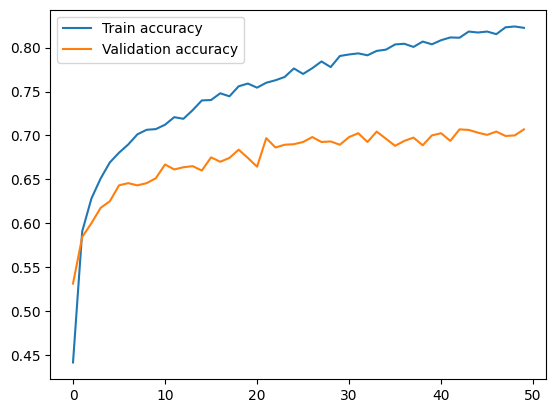

In [26]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [ ]:
"""
[Under 100 words] Write your answer here:
It can be seen that, as expected, with increasing number of iterations, accuracy of both-train and validation graphs, increases.
Train accuracy keeps on increasing while validation accuracy becomes approximately constant (with a lower value as compared to train accuracy), again indicating OVERFITTING.
This gap indicates that the model is not performing efficiently on unseen data (validation set). 
"""

In [27]:
#Checking the prediction

Y_predicted = model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [28]:
# Calculate the R2score for the test data

#print(Y_test.shape)
#print(Y_predicted.shape)

from sklearn.metrics import r2_score
Y_predicted = np.argmax(Y_predicted, axis = 1)   #this is done because Y_test has shape(2000,) while Y_predicted has shape(2000,10), hence max value (of probability, because it tells how close our model is to the true value) from each of the 10 columns of Y_predicted is taken into account
#final Y_predicted has shape same as that of Y_test (2000,) and it is formed by taking max value from each 10 columns of initial Y_predicted
print(r2_score(Y_test, Y_predicted))

0.6040896439335945


In [29]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [30]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)
print(model.layers[4].kernel.shape)  #output layer

(128, 64)
(64, 64)
(64, 10)


In [ ]:
# Does that satisfied the matrix multiplication math discussed earlier

In [ ]:
'''
Yes.
Input layer has shape (1,784) and first kernel has shape (784,128). hence, output layer in this case has shape (1,128)
second layer has shape (128,64), which on multiplication with output of the previous layer gives output of the shape (1,64)
similarly, third layer has shape (64,64), which on multiplication with output of the previous layer gives output of the shape (1,64)
finally, last layer has shape (64,10), which on multiplication with output of the previous layer gives final output of the shape (1,10).
Hence, matrix multiplication is satisfied at each step.
'''